[*********************100%***********************]  1 of 1 completed


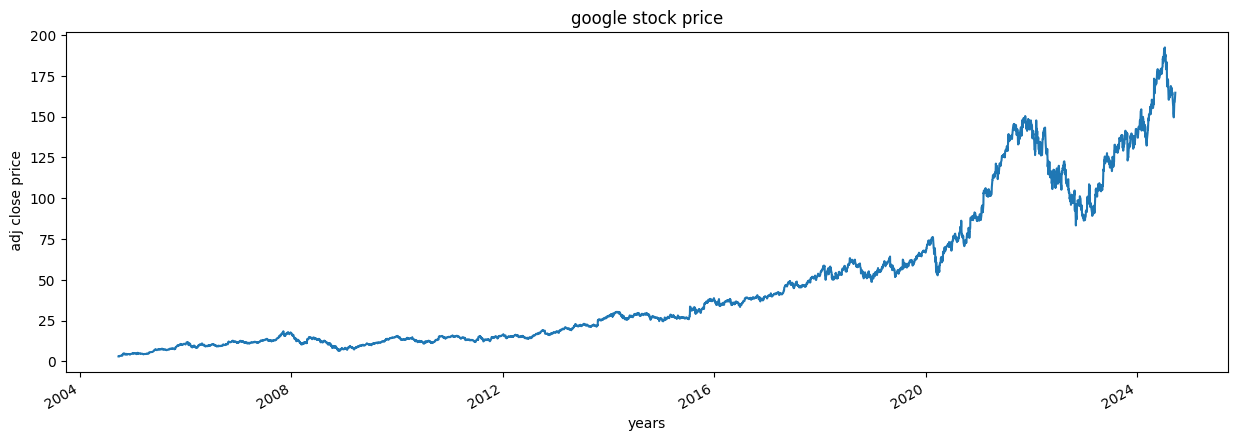

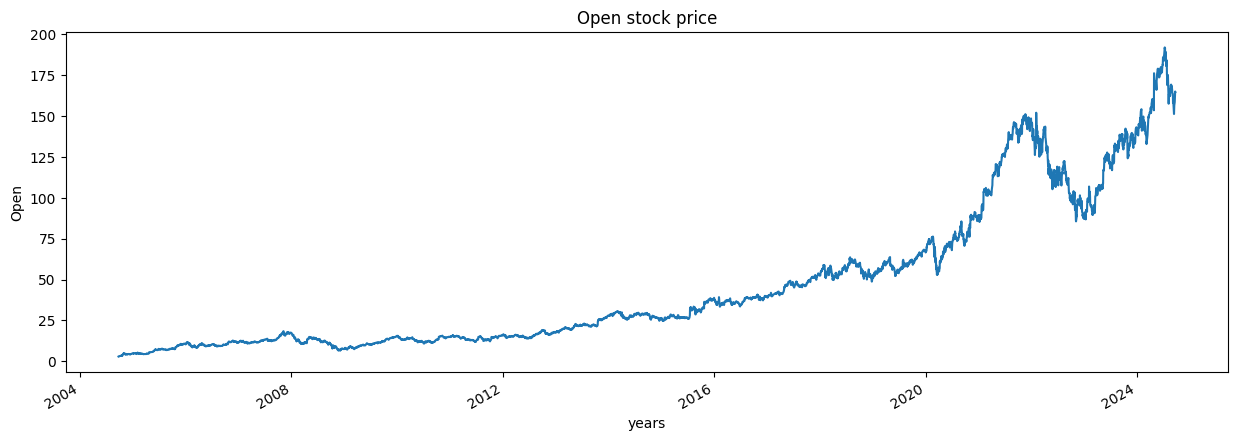

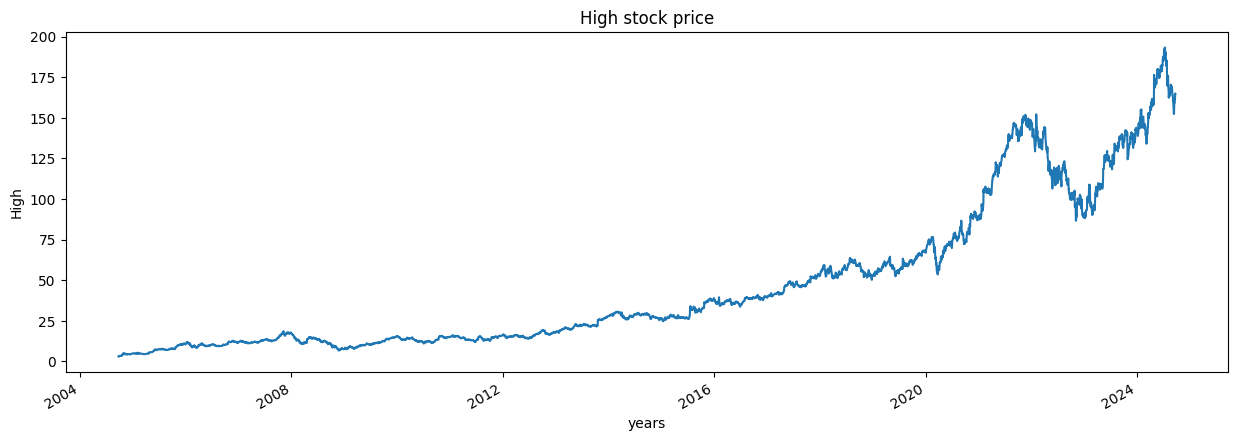

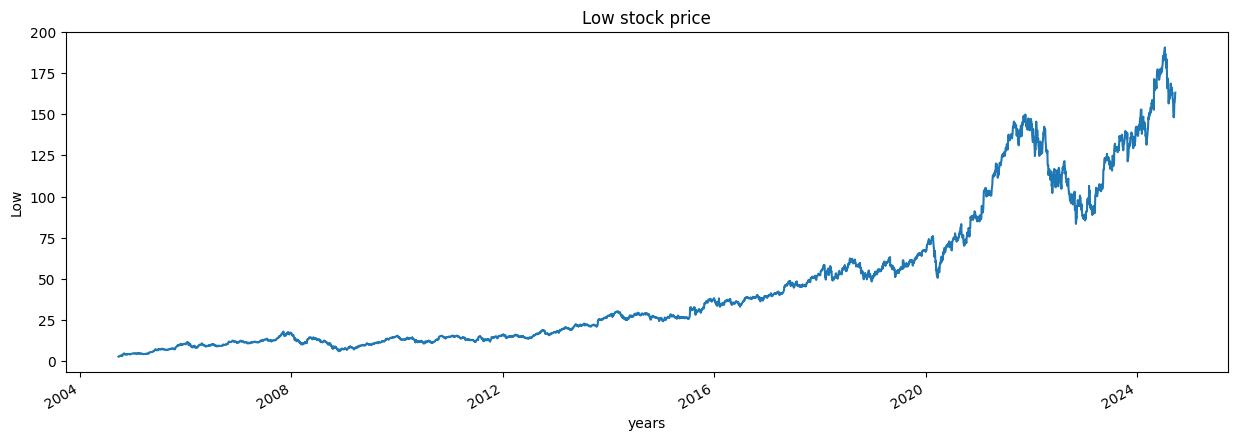

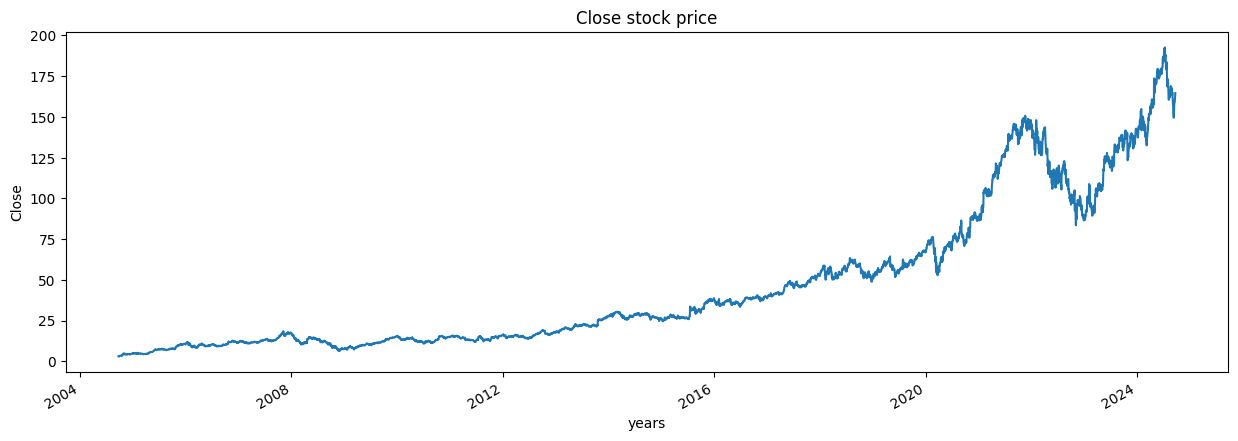

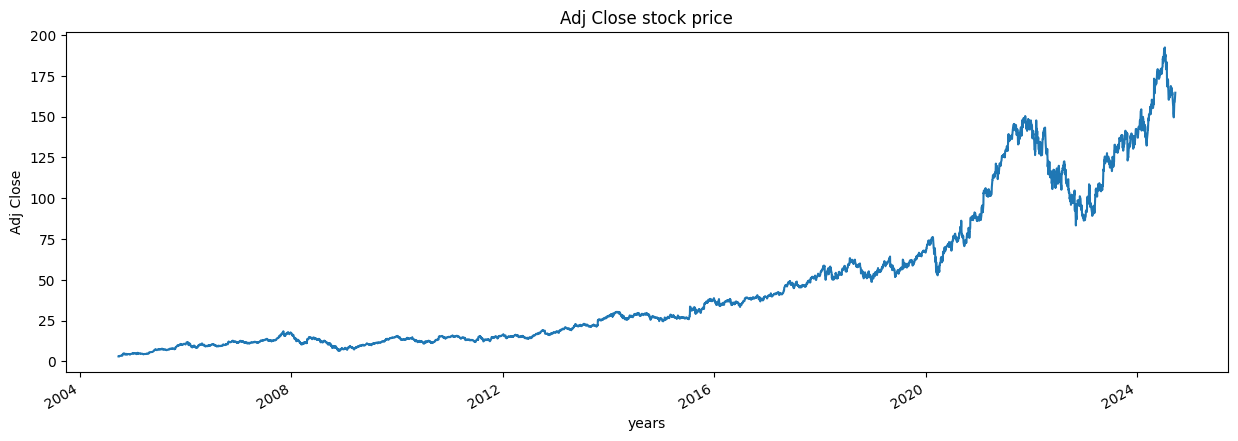

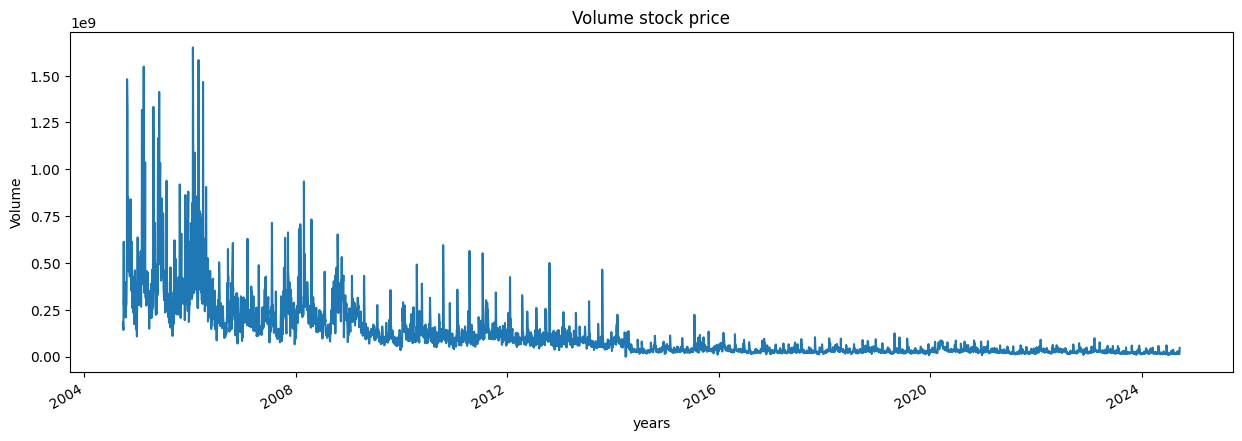

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta
end = datetime.now()
start = end.replace(year=end.year - 20)
stock = "GOOG"
stock_data = yf.download(stock, start, end)
# stock_data.isna().sum()
plt.figure(figsize=(15,5))
stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel(' adj close price')
plt.title('google stock price')
# stock_data.head()

def plot_graph(figuresize,values,columnname,heading):
    plt.figure()
    values.plot(figsize=figuresize)
    plt.xlabel("years")
    plt.ylabel(columnname)
    plt.title(f'{heading} stock price')
stock_data.columns
for item in stock_data.columns:
    plot_graph((15,5),stock_data[item],item,item)

In [ ]:
for i in range(2004,2024):
    print(i,list(stock_data.index.year).count(i))

2004 70
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


<Figure size 640x480 with 0 Axes>

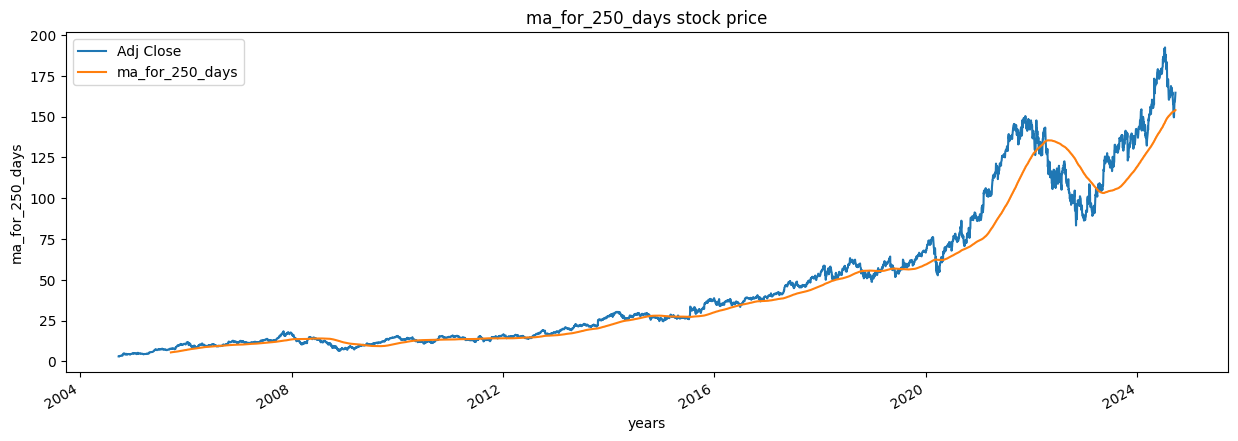

In [ ]:
stock_data['ma_for_250_days'] = stock_data['Adj Close'].rolling(window=250).mean()
stock_data['ma_for_100_days'] = stock_data['Adj Close'].rolling(window=100).mean()
# stock_data['ma_for_250_days'][0:250].tail()
plot_graph((15,5),stock_data[['Adj Close','ma_for_250_days']],'ma_for_250_days','ma_for_250_days')

<Figure size 640x480 with 0 Axes>

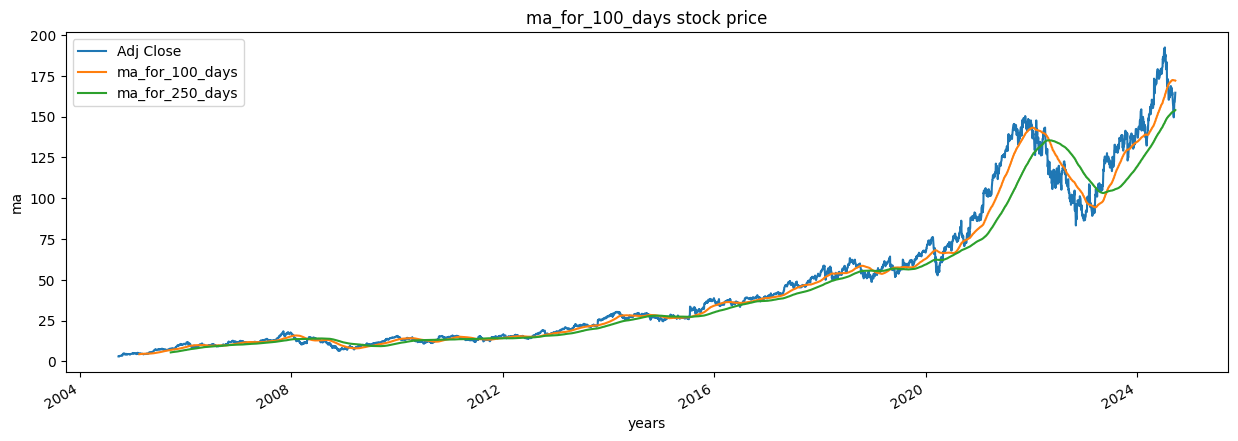

In [ ]:
plot_graph((15,5),stock_data[['Adj Close','ma_for_100_days','ma_for_250_days']],'ma','ma_for_100_days')

In [ ]:
stock_data['percentage_change'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close','percentage_change']].head()


,Adj Close,percentage_change
Date,,
2004-09-23,3.001849,NaN
2004-09-24,2.977252,-0.008194
2004-09-27,2.938244,-0.013102
2004-09-28,3.151917,0.072721
2004-09-29,3.256765,0.033265


In [ ]:
Adj_close_price = stock_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([2.93824434]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[3.35700132e-04],
       [2.05876920e-04],
       [0.00000000e+00],
       ...,
       [8.33234923e-01],
       [8.46060317e-01],
       [8.53449377e-01]])

In [ ]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data , y_data = np.array(x_data), np.array(y_data)

x_data[0],y_data[0]

(array([[0.0003357 ],
        [0.00020588],
        [0.        ],
        [0.00112775],
        [0.00168113],
        [0.00148705],
        [0.00187783],
        [0.00220304],
        [0.00263709],
        [0.00246793],
        [0.00270003],
        [0.00255316],
        [0.00222926],
        [0.00250989],
        [0.00296885],
        [0.0031131 ],
        [0.00338979],
        [0.00405202],
        [0.00389203],
        [0.00291509],
        [0.00408086],
        [0.00710349],
        [0.00906655],
        [0.00833221],
        [0.00887903],
        [0.00984024],
        [0.00949143],
        [0.01019823],
        [0.01004612],
        [0.00962649],
        [0.00871249],
        [0.0066996 ],
        [0.00711922],
        [0.00661436],
        [0.00650421],
        [0.00849219],
        [0.00835843],
        [0.00873478],
        [0.00711791],
        [0.00711267],
        [0.00646225],
        [0.00670615],
        [0.00614228],
        [0.00645962],
        [0.00740903],
        [0

In [ ]:
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [ ]:
modle = Sequential()
modle.add(LSTM(120, return_sequences = True,input_shape = (x_train.shape[1],1)))
modle.add(LSTM(64, return_sequences = False))
modle.add(Dense(25))
modle.add(Dense(1))

modle.compile(optimizer="adam",loss="mean_squared_error")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modle.fit(x_train,y_train,batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 333s 96ms/step - loss: 1.9166e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 378s 94ms/step - loss: 5.1542e-05


In [ ]:
modle.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 120)            │          58,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          47,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,715 (1.23 MB)

 Trainable params: 107,571 (420.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 215,144 (840.41 KB)

In [ ]:
predictions = modle.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


array([[0.25354275],
       [0.2561793 ],
       [0.2556982 ],
       ...,
       [0.75629425],
       [0.7584198 ],
       [0.76425153]], dtype=float32)

In [ ]:
inv_prediction = scaler.inverse_transform(predictions)
inv_prediction



array([[ 53.36893845],
       [ 52.75992966],
       [ 51.8771019 ],
       ...,
       [160.80999756],
       [163.24000549],
       [164.63999939]])

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.36893845],
       [ 52.75992966],
       [ 51.8771019 ],
       ...,
       [160.80999756],
       [163.24000549],
       [164.63999939]])

In [ ]:
rever = np.sqrt(np.mean((inv_prediction -  inv_y_test)**2))
rever

8.635040199371101

In [ ]:
import pandas as pd
ploting_data = pd.DataFrame(
    {
        'actual':inv_y_test.reshape(-1),
        'predicted':inv_prediction.reshape(-1)
    },
    index = stock_data.index[splitting_len+100:]
)
ploting_data.head()

,actual,predicted
Date,,
2018-11-01,53.368938,50.976601
2018-11-02,52.759930,51.476147
2018-11-05,51.877102,51.384991
2018-11-06,52.661175,50.808716
2018-11-07,54.535572,50.782715


<Figure size 640x480 with 0 Axes>

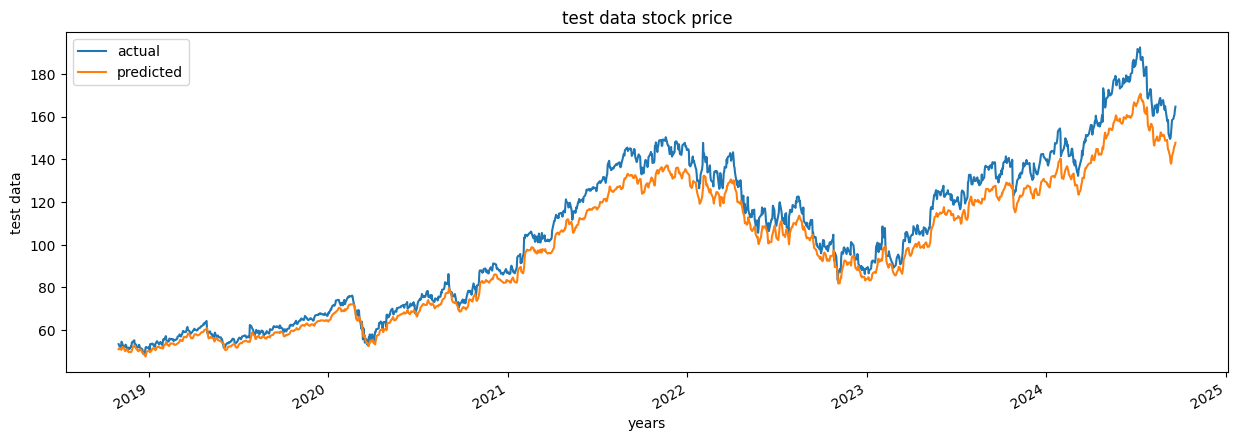

In [ ]:
plot_graph((15,5),ploting_data,'test data','test data')

<Figure size 640x480 with 0 Axes>

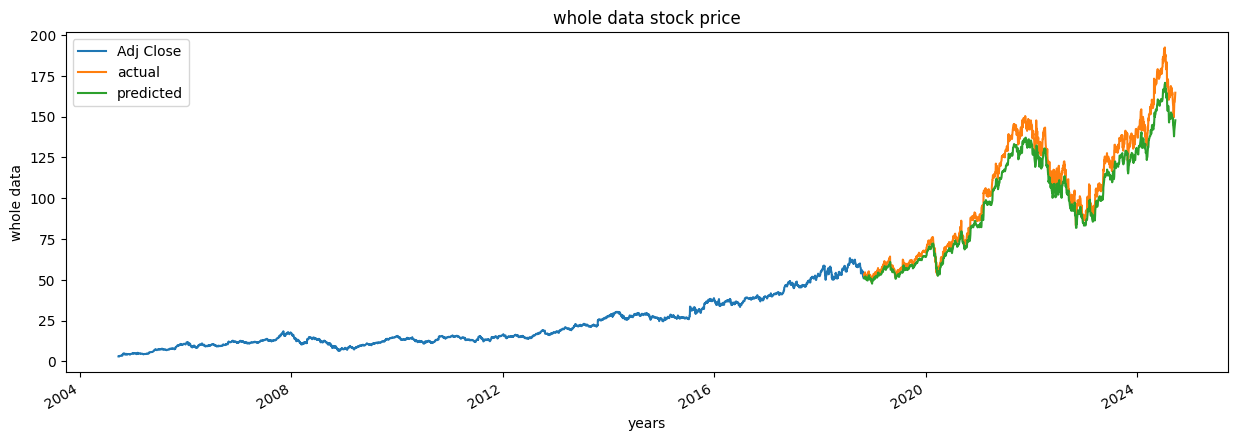

In [ ]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis = 0),'whole data','whole data')

In [ ]:
import os

# Save the model
modle.save('latest_stock_price_model.keras')

# Check the current working directory
print("Model saved at:", os.getcwd())

Model saved at: /content


In [ ]:
from google.colab import files

# Download the saved model file
files.download('/content/latest_stock_price_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>